<a href="https://colab.research.google.com/github/jprpower104/Modelo_de_Un_diodo_para_Paneles_fotovoltaicos1/blob/master/Modelo_de_Un_diodo_para_Paneles_fotovoltaicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Modelo de un Panel FotoVoltaico

<img src="https://instalacionesyeficienciaenergetica.com/wp-content/uploads/2015/02/17866138_m-700x542.jpg">

Copyright  ® by (Julián Peláez Restrepo, Ph.D.)$~^{TM}$



<div style="text-align: justify">El presente texto explica como obtener los parametros del modelo matematico de un panel fotovoltaico basado en el modelo de un diodo. Extrayendo informacion de los Parametros del Datasheet proporcionado por el fabricante del panel, Entonces el Modelo de un diodo en un panel fotovoltaico esta representado por: &nbsp;</div>

<br> 
<center> <font size = 10> $I_{pv}=I_{ph} - I_{sat}(e^{\frac{I_{pv}R_s+V_{pv}}{an_sV_T}}-1)-\frac{I_{pv}R_s+V_{pv}}{R_P} $</font></center>


# Parametros del Datasheet PV de Mitsubishi referencia MLU255HC

$P_{peak}~=~255~W$ Potencia Pico

$V_{oc}~=~37.8~V$ Corriente de Circuito Abierto

$I_{sc}~=~8.89~A$ Corriente de Corto Circuito

$V_{mpp}~=~31.2~V$ Voltaje de maximo Punto de Potencia

$I_{mpp}~=~8.18~A$ Corriente de maximo Punto de Potencia

$\alpha_v    =  -0.3590000 \frac{V_{oc}}{100} \left[ \frac{\%}{~^{0}K} \right] $ coeficiente de temperaturta de $V_{oc}$

$\alpha_i    =   0.0560000\frac{I_{sc}}{100} \left[ \frac{\%}{~^{0}K} \right]$  coeficiente de temperatura de $I_{sc}$ 

$n_s~=~120$ numero de celdas en serie 

# Varibles fisicas del material (Silicio Monocristalino)

$E_{gap}~=~1.794~\times~10^{-19}~J$ Banda de Energia silicio monocristalino


$k~=~1.3806503\times~10^{-23} ~\left[ \frac{J}{~^{0}K} \right]$ Constante de Boltzman

$q~=~1.60217646 \times 10^{-19}~C$ Carga electron  

$T_{stc}~=~ (25+273.15)~(ºK)$ grados Kelvin $stc$=standart test conditions 

$G_{stc}~=~1000~\left[ \frac{W}{m^2} \right]$ radiacion solar a $stc$.

$a$ Factor de idealidad







El factor de idealidad del Diodo es a =  0.5468803051543754
La  corriente  de saturacion  es Isat =  1.6315150817201502e-09
La resistencia serie del panel  es Rs =  0.1803987818165787
La resistencia shunt del panel  es Rp =  114.8941527802248





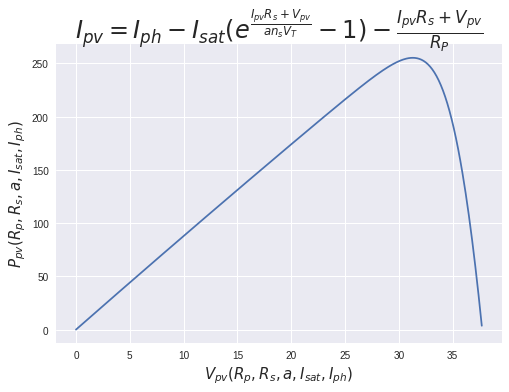

In [0]:
from math import exp, expm1
from scipy.special import lambertw

Ppeak = 255.0000000;
Voc   =  37.8000000; 
Isc   =   8.8900000;
Vmpp  =  31.2000000;
Impp  =   8.1800000; 
av    =  -0.3590000*Voc/100; 
ai    =   0.05


# Another Values

q = 1.60217646e-19; # C Couloumbsk = 1.3806503e-23   # J/ºK Joules/KelvinTstc = 25 + 273.15;    # ºK KelvinVt = k*Tstc/q;      # Voltaje Termico V Voltiosns = 120; # numero de celdas en serieEgap = 1.794e-19; # J Joulios Banda valencia del silicio

a=(av-Voc/Tstc)/( ns*Vt*( ai/Isc-3/Tstc-Egap/(k*Tstc**2) ) );
Isat=Isc*exp( -Voc/( a*ns*Vt ) );

print("\n\n");
print("El factor de idealidad del Diodo es a = ",a);
print("La  corriente  de saturacion  es Isat = ",Isat);

sigma=lambertw( (Vmpp*(2*Impp-Isc-Isat )/(a*ns*Vt*Isat))*exp( Vmpp*( Vmpp/(a*ns*Vt)**2 - 2/(a*ns*Vt) ) ) );
x=sigma + 2*Vmpp/(a*ns*Vt) - (Vmpp/(a*ns*Vt))**2;
Rs= (x.real*a*ns*Vt - Vmpp )/Impp;
Rp=x.real*a*ns*Vt/( Isc - Impp - Isat*(exp(x.real) -1) );

print("La resistencia serie del panel  es Rs = ",Rs);
print("La resistencia shunt del panel  es Rp = ",Rp);
print("\n\n");
Vtd=a*ns*Vt;

import matplotlib.pyplot as plt
import numpy as np

Ipvm =[];
Ipvmr =[];
Vpv=(np.arange(0.0, Voc, 0.1));

for i in Vpv: 
    Ipvm.append(-(lambertw(Isat*Rp*Rs*exp((Isc*Rs+Isat*Rs+i)*Rp/((Rp+Rs)*Vtd))/((Rp+Rs)*Vtd))*Vtd*Rp+lambertw(Isat*Rp*Rs*exp((Isc*Rs+Isat*Rs+i)*Rp/((Rp+Rs)*Vtd))/((Rp+Rs)*Vtd))*Vtd*Rs-Isc*Rp*Rs-Isat*Rp*Rs+i*Rs)/((Rp+Rs)*Rs));


for j in Ipvm:
    Ipvmr.append(j.real);


plt.title(r'$I_{pv}=I_{ph} - I_{sat}(e^{\frac{I_{pv}R_s+V_{pv}}{an_sV_T}}-1)-\frac{I_{pv}R_s+V_{pv}}{R_P}$',fontsize=24);
plt.xlabel(r'$V_{pv}(R_p,R_s,a,I_{sat},I_{ph})$',fontsize=15);
plt.ylabel(r'$P_{pv}(R_p,R_s,a,I_{sat},I_{ph})$',fontsize=15);
plt.plot(Vpv,Vpv*Ipvmr);
plt.show();